<a href="https://colab.research.google.com/github/SadeemAlasiri/exzm_week4/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
# #https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
# !pip install gdown
# !gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.layers import Dropout

In [ ]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58613 entries, 0 to 58612
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School_Year                      58613 non-null  object 
 1   Busbreakdown_ID                  58613 non-null  int64  
 2   Run_Type                         58585 non-null  object 
 3   Bus_No                           58612 non-null  object 
 4   Route_Number                     58576 non-null  object 
 5   Reason                           58562 non-null  object 
 6   Schools_Serviced                 58612 non-null  object 
 7   Occurred_On                      58612 non-null  object 
 8   Created_On                       58612 non-null  object 
 9   Boro                             56340 non-null  object 
 10  Bus_Company_Name                 58612 non-null  object 
 11  How_Long_Delayed                 49738 non-null  object 
 12  Number_Of_Students

In [ ]:
df

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",5.0,Yes,Yes,No,25406,10/26/2015 08:40:39 AM,1,Pre-K
1,2015-2016,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",3.0,Yes,Yes,No,25517,10/27/2015 07:11:22 AM,1,Pre-K
2,2015-2016,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",12.0,Yes,Yes,Yes,22562,09/18/2015 07:38:44 AM,1,Pre-K
3,2015-2016,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",11.0,Yes,Yes,Yes,22399,09/17/2015 08:12:08 AM,1,Pre-K
4,2015-2016,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",12.0,Yes,Yes,No,22569,09/18/2015 07:56:40 AM,1,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58608,2016-2017,Special Ed AM Run,1406,R580,Heavy Traffic,31414,07/22/2016 07:32:00 AM,07/22/2016 07:35:00 AM,Staten Island,PRIDE TRANSPORTATION (SCH,5.0,Yes,Yes,No,21044,07/22/2016 07:35:34 AM,1,School-Age
58609,2016-2017,Special Ed AM Run,1348,M937,Heavy Traffic,02444,07/22/2016 07:35:00 AM,07/22/2016 07:36:00 AM,Manhattan,HOYT TRANSPORTATION CORP.,1.0,Yes,Yes,No,21045,07/22/2016 07:36:41 AM,1,School-Age
58610,2016-2017,Special Ed AM Run,1475,R584,Heavy Traffic,31422,07/22/2016 07:36:00 AM,07/22/2016 07:37:00 AM,Staten Island,PRIDE TRANSPORTATION (SCH,7.0,Yes,Yes,No,21046,07/22/2016 07:37:40 AM,1,School-Age
58611,2016-2017,Special Ed AM Run,1494,M940,Heavy Traffic,02035,07/22/2016 07:36:00 AM,07/22/2016 07:37:00 AM,Manhattan,HOYT TRANSPORTATION CORP.,1.0,Yes,Yes,No,21046,07/22/2016 07:37:51 AM,1,School-Age


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Busbreakdown_ID']

,Busbreakdown_ID
0,1224901
1,1225098
2,1215800
3,1215511
4,1215828
...,...
58608,1279278
58609,1279279
58610,1279280
58611,1279281


array([[<Axes: title={'center': 'Busbreakdown_ID'}>,
        <Axes: title={'center': 'Number_Of_Students_On_The_Bus'}>]],
      dtype=object)

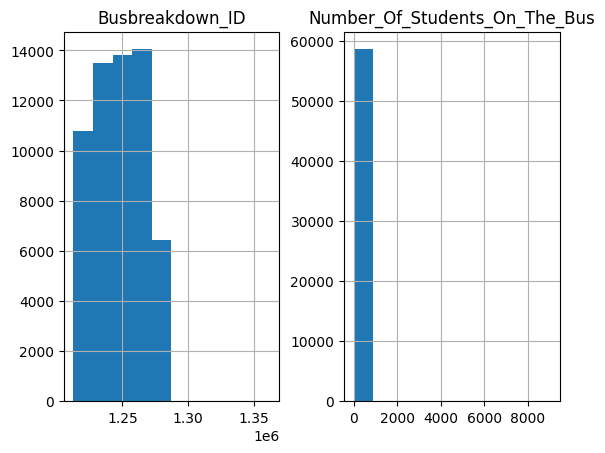

In [ ]:
df.hist()

In [ ]:
df['Boro']

,Boro
0,Bronx
1,Bronx
2,Bronx
3,Bronx
4,Bronx
...,...
58608,Staten Island
58609,Manhattan
58610,Staten Island
58611,Manhattan


In [ ]:
df['Route_Number']

,Route_Number
0,1
1,1
2,2
3,2
4,2
...,...
58608,R580
58609,M937
58610,R584
58611,M940


In [ ]:
df.drop(columns='Incident_Number',inplace=True)

In [ ]:
df.drop(columns='Busbreakdown_ID',inplace=True)

In [ ]:
df.drop(columns='How_Long_Delayed',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58613 entries, 0 to 58612
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School_Year                      58613 non-null  object 
 1   Run_Type                         58585 non-null  object 
 2   Bus_No                           58612 non-null  object 
 3   Route_Number                     58576 non-null  object 
 4   Reason                           58562 non-null  object 
 5   Schools_Serviced                 58612 non-null  object 
 6   Occurred_On                      58612 non-null  object 
 7   Created_On                       58612 non-null  object 
 8   Boro                             56340 non-null  object 
 9   Bus_Company_Name                 58612 non-null  object 
 10  Number_Of_Students_On_The_Bus    58612 non-null  float64
 11  Has_Contractor_Notified_Schools  58612 non-null  object 
 12  Has_Contractor_Not

In [ ]:
label_encoder = LabelEncoder()
df['School_Year'] = label_encoder.fit_transform(df['School_Year'])

In [ ]:
label_encoder = LabelEncoder()
df['Run_Type'] = label_encoder.fit_transform(df['Run_Type'])

In [ ]:
label_encoder = LabelEncoder()
df['Route_Number'] = label_encoder.fit_transform(df['Route_Number'])

In [ ]:
label_encoder = LabelEncoder()
df['Reason'] = label_encoder.fit_transform(df['Reason'])

In [ ]:
label_encoder = LabelEncoder()
df['Schools_Serviced'] = label_encoder.fit_transform(df['Schools_Serviced'])

In [ ]:
label_encoder = LabelEncoder()
df['Occurred_On'] = label_encoder.fit_transform(df['Occurred_On'])

In [ ]:
label_encoder = LabelEncoder()
df['Created_On'] = label_encoder.fit_transform(df['Created_On'])

In [ ]:
label_encoder = LabelEncoder()
df['Boro'] = label_encoder.fit_transform(df['Boro'])

In [ ]:
label_encoder = LabelEncoder()
df['Bus_Company_Name'] = label_encoder.fit_transform(df['Bus_Company_Name'])

In [ ]:
label_encoder = LabelEncoder()
df['Have_You_Alerted_OPT'] = label_encoder.fit_transform(df['Have_You_Alerted_OPT'])

In [ ]:
label_encoder = LabelEncoder()
df['Has_Contractor_Notified_Schools'] = label_encoder.fit_transform(df['Has_Contractor_Notified_Schools'])

In [ ]:
label_encoder = LabelEncoder()
df['Has_Contractor_Notified_Parents'] = label_encoder.fit_transform(df['Has_Contractor_Notified_Parents'])

In [ ]:
label_encoder = LabelEncoder()
df['Bus_No'] = label_encoder.fit_transform(df['Bus_No'])

In [ ]:
label_encoder = LabelEncoder()
df['Last_Updated_On'] = label_encoder.fit_transform(df['Last_Updated_On'])

In [ ]:
label_encoder = LabelEncoder()
df['School_Age_or_PreK'] = label_encoder.fit_transform(df['School_Age_or_PreK'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58613 entries, 0 to 58612
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School_Year                      58613 non-null  int64  
 1   Run_Type                         58613 non-null  int64  
 2   Bus_No                           58613 non-null  int64  
 3   Route_Number                     58613 non-null  int64  
 4   Reason                           58613 non-null  int64  
 5   Schools_Serviced                 58613 non-null  int64  
 6   Occurred_On                      58613 non-null  int64  
 7   Created_On                       58613 non-null  int64  
 8   Boro                             58613 non-null  int64  
 9   Bus_Company_Name                 58613 non-null  int64  
 10  Number_Of_Students_On_The_Bus    58612 non-null  float64
 11  Has_Contractor_Notified_Schools  58613 non-null  int64  
 12  Has_Contractor_Not

In [ ]:
df.isna().sum()

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [ ]:
df['Number_Of_Students_On_The_Bus'].isna().sum()

1

In [ ]:
df.dropna()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,3,5980,52,6,3357,23207,25406,1,27,5.0,1,1,0,25406,45578,1,0
1,0,3,6449,52,3,3411,23318,25517,1,27,3.0,1,1,0,25517,45761,1,0
2,0,3,3753,131,3,3325,20778,22562,1,27,12.0,1,1,1,22562,40361,1,0
3,0,3,3667,131,6,3324,20647,22399,1,27,11.0,1,1,1,22399,40106,1,0
4,0,3,3671,131,6,3469,20781,22569,1,27,12.0,1,1,0,22569,40421,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58607,1,8,1264,3584,3,245,19476,21044,4,31,2.0,1,1,0,21044,37361,1,1
58608,1,8,1162,6541,3,3125,19474,21044,9,64,5.0,1,1,0,21044,37362,1,1
58609,1,8,1090,3844,3,186,19477,21045,4,31,1.0,1,1,0,21045,37363,1,1
58610,1,8,1301,6542,3,3129,19478,21046,9,64,7.0,1,1,0,21046,37364,1,1


In [ ]:
df.describe()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
count,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58612.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000,58613.000000
mean,0.037688,6.444628,3732.477420,3797.449354,4.207053,1850.082695,14439.259021,15736.902394,3.935475,42.792213,4.062155,0.946599,0.759644,0.311091,15736.902394,28906.034839,0.887755,0.872844
std,0.190800,3.142571,2381.485676,2578.996341,1.919964,1104.855499,8742.690223,9528.799305,3.030020,21.973716,69.087180,0.224910,0.427343,0.462981,9528.799305,16706.092549,0.315724,0.333202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1503.000000,1391.000000,3.000000,812.000000,6538.000000,7150.000000,1.000000,27.000000,0.000000,1.000000,1.000000,0.000000,7150.000000,14421.000000,1.000000,1.000000
50%,0.000000,8.000000,3465.000000,3489.000000,3.000000,1870.000000,14311.000000,15503.000000,2.000000,43.000000,0.000000,1.000000,1.000000,0.000000,15503.000000,28905.000000,1.000000,1.000000
75%,0.000000,8.000000,5923.000000,6169.000000,6.000000,2948.000000,22161.000000,24193.000000,7.000000,62.000000,4.000000,1.000000,1.000000,1.000000,24193.000000,43375.000000,1.000000,1.000000
max,2.000000,11.000000,8333.000000,8558.000000,10.000000,3485.000000,29428.000000,32127.000000,11.000000,89.000000,9007.000000,2.000000,2.000000,2.000000,32127.000000,57830.000000,2.000000,2.000000


In [ ]:
df.corr()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
School_Year,1.000000,0.041168,-0.002047,-0.012784,-0.000297,0.016140,0.093283,0.090487,0.013148,-0.031184,-0.001800,0.011913,0.071551,0.010198,0.090487,0.083469,-0.027770,-0.045384
Run_Type,0.041168,1.000000,0.109865,0.174485,-0.016831,-0.298167,0.012470,0.012126,0.125832,0.063799,-0.002124,-0.017026,0.333767,0.154562,0.012126,0.012908,-0.019651,0.417720
Bus_No,-0.002047,0.109865,1.000000,0.003653,0.109741,0.106439,-0.020254,-0.020284,-0.135239,0.152073,0.000277,-0.004055,0.061482,-0.081686,-0.020284,-0.020216,0.015703,-0.028556
Route_Number,-0.012784,0.174485,0.003653,1.000000,-0.058478,-0.226272,-0.031660,-0.031879,0.294486,0.093028,-0.012272,-0.054201,-0.249525,0.055336,-0.031879,-0.032263,-0.115090,0.488354
Reason,-0.000297,-0.016831,0.109741,-0.058478,1.000000,0.042886,-0.116364,-0.115938,-0.072785,-0.034457,-0.010284,0.000003,0.035557,-0.083634,-0.115938,-0.117361,-0.299775,0.020246
Schools_Serviced,0.016140,-0.298167,0.106439,-0.226272,0.042886,1.000000,0.006360,0.006443,0.261084,-0.083870,0.001170,-0.033776,0.015824,-0.107465,0.006443,0.005469,0.010585,-0.527155
Occurred_On,0.093283,0.012470,-0.020254,-0.031660,-0.116364,0.006360,1.000000,0.999964,-0.017803,-0.039806,-0.000014,-0.018004,-0.000249,-0.068886,0.999964,0.999491,0.013389,-0.046731
Created_On,0.090487,0.012126,-0.020284,-0.031879,-0.115938,0.006443,0.999964,1.000000,-0.017982,-0.039806,0.000025,-0.018111,-0.000413,-0.069187,1.000000,0.999541,0.013490,-0.046845
Boro,0.013148,0.125832,-0.135239,0.294486,-0.072785,0.261084,-0.017803,-0.017982,1.000000,0.069278,-0.005188,-0.091254,-0.143740,0.038122,-0.017982,-0.018734,-0.028259,0.328890
Bus_Company_Name,-0.031184,0.063799,0.152073,0.093028,-0.034457,-0.083870,-0.039806,-0.039806,0.069278,1.000000,0.000856,-0.046538,-0.152619,0.153953,-0.039806,-0.039174,-0.037887,0.226562


<Axes: >

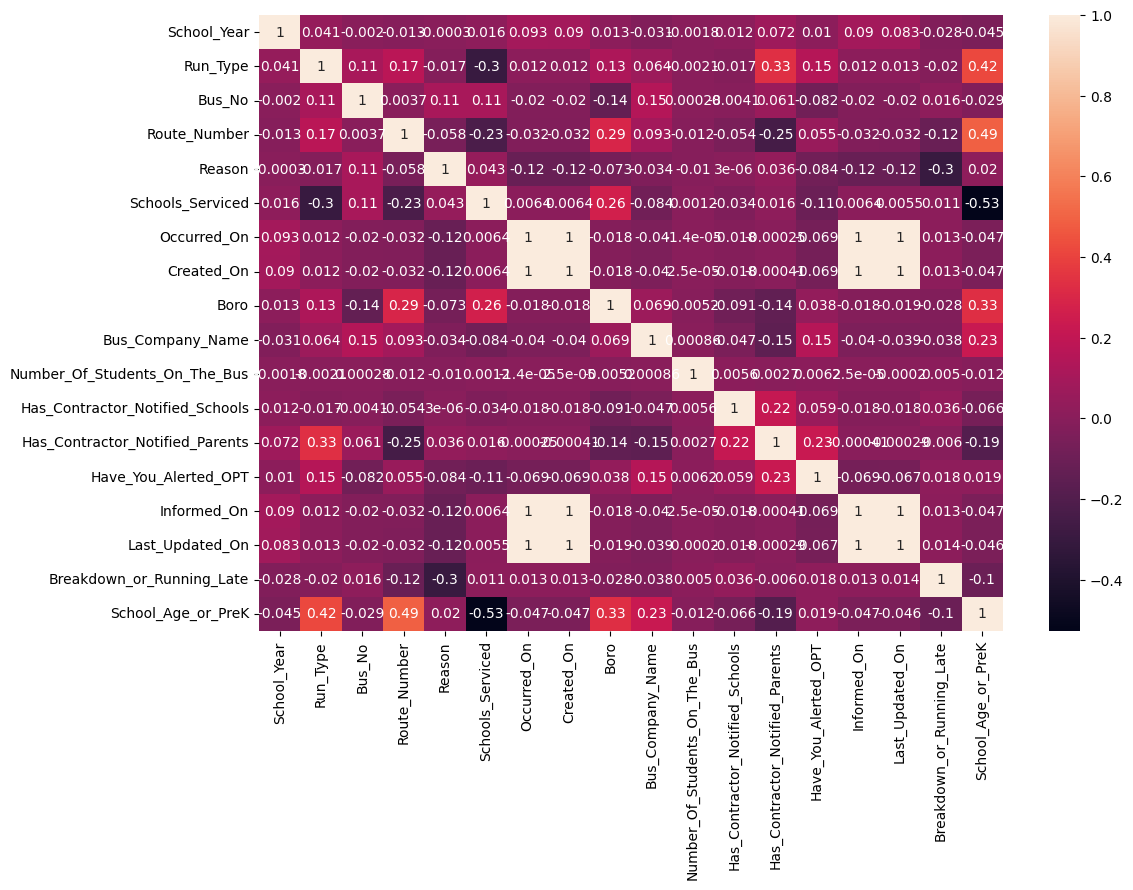

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Figure size 5000x5000 with 0 Axes>

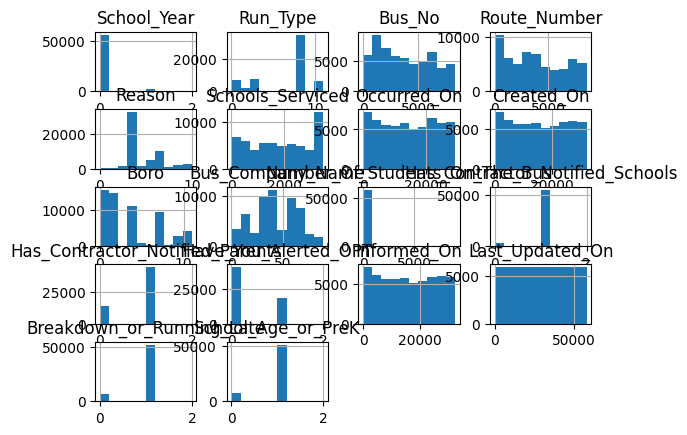

In [ ]:
plt.figure(figsize=(50,50))
df.hist();

In [ ]:
df['School_Age_or_PreK'].value_counts()

,count
School_Age_or_PreK,
School-Age,51158
Pre-K,7454


In [ ]:
df['Breakdown_or_Running_Late'].value_counts()# target

,count
Breakdown_or_Running_Late,
Running Late,52032
Breakdown,6580


In [ ]:
label_encoder = LabelEncoder()
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])

In [ ]:
df['Breakdown_or_Running_Late'].value_counts()# target

,count
Breakdown_or_Running_Late,
1,52032
0,6580
2,1


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X=df.drop(columns='Breakdown_or_Running_Late')
y=df['Breakdown_or_Running_Late']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scale = StandardScaler()

In [ ]:
scale_X=scale.fit_transform(X_train)

In [ ]:
scale_X

array([[-0.19619551,  0.49725524, -1.22298263, ..., -1.12635778,
        -1.09946549,  0.38207126],
       [-0.19619551,  0.49725524,  1.38468731, ..., -0.60633246,
        -0.58249533,  0.38207126],
       [-0.19619551, -1.09156796,  1.40656515, ...,  0.26303085,
         0.27067574, -2.61731283],
       ...,
       [-0.19619551,  0.49725524, -0.48881289, ...,  0.63804005,
         0.59862999,  0.38207126],
       [-0.19619551,  0.49725524, -1.15692839, ...,  1.53621798,
         1.55715517,  0.38207126],
       [ 5.07880871,  0.49725524, -1.13000182, ...,  0.40511313,
         0.38224472,  0.38207126]])

In [ ]:
X_train.shape[1]

17

In [ ]:
scale_X_val=scale.transform(X_test)

In [ ]:
scale_X_val

array([[-0.19619551,  0.49725524,  1.62323989, ...,  0.32988078,
         0.32720721,  0.38207126],
       [-0.19619551, -2.04486189, -1.31848781, ...,  1.17891668,
         1.16794853,  0.38207126],
       [-0.19619551,  0.49725524, -0.21449847, ...,  0.67513232,
         0.64356833,  0.38207126],
       ...,
       [-0.19619551,  1.13278453, -0.00665901, ..., -0.12161814,
        -0.09468729,  0.38207126],
       [-0.19619551,  0.49725524, -1.15272111, ...,  1.23445031,
         1.2290814 ,  0.38207126],
       [-0.19619551,  0.49725524,  0.35348386, ..., -0.98637111,
        -0.94905353,  0.38207126]])

In [ ]:
X_train.shape

(46890, 17)

In [ ]:
y_train.shape

(46890,)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model=Sequential([

    (Dense(units=32,input_dim=X_train.shape[1],kernel_initializer='uniform',activation='relu')),
    (Dense(units=32,activation='relu')),
    (Dense(units=32,activation='relu')),
     Dropout(0.3),

    (Dense(units=64,activation='relu')),
    (Dense(units=56,activation='relu')),
     Dropout(0.3),

    (Dense(units=128,activation='relu')),
    (Dense(units=128,activation='relu')),
     Dropout(0.4),

    (Dense(units=128,activation='relu')),
    (Dense(units=3,activation='softmax'))

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 56)                  │           3,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           7,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,147 (191.98 KB)

 Trainable params: 49,147 (191.98 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history=model.fit(scale_X,y_train,batch_size=32,epochs=20,validation_split=0.2)

Epoch 1/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8914 - loss: 0.3434 - val_accuracy: 0.9090 - val_loss: 0.2234
Epoch 2/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9100 - loss: 0.2218 - val_accuracy: 0.9256 - val_loss: 0.1832
Epoch 3/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9183 - loss: 0.1975 - val_accuracy: 0.9380 - val_loss: 0.1616
Epoch 4/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9325 - loss: 0.1728 - val_accuracy: 0.9358 - val_loss: 0.1553
Epoch 5/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9345 - loss: 0.1656 - val_accuracy: 0.9392 - val_loss: 0.1567
Epoch 6/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9379 - loss: 0.1582 - val_accuracy: 0.9385 - val_loss: 0.1484
Epoch 7/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9418 - loss: 0.1528 - val_accuracy: 0.9425 - val_loss: 0.1403
Epoch 8/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9426 - loss: 0.1474 - 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(scale_X,y_train)

1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9506 - loss: 0.1343


[0.13522419333457947, 0.9497334361076355]

In [ ]:
model.evaluate(scale_X_val,y_test)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9474 - loss: nan


[nan, 0.9474537372589111]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pre=model.predict(X_test)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

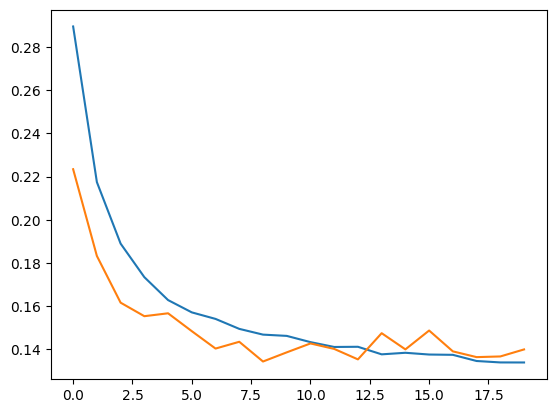

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: